In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

## Data Exploration

In [2]:
# Data setup load train and test datasets
DATA_PATH='../../data'
test_data = pd.read_csv(f'{DATA_PATH}/test.csv')
train_data = pd.read_csv(f'{DATA_PATH}/train.csv')

In [3]:
# identify the number of rows and columns in the train dataset
data_shape = train_data.shape
print(f'the dataset has {data_shape[0]} rows and {data_shape[1]} columns')

the dataset has 1460 rows and 81 columns


In [4]:
# inspect the rows of the datasets
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# check for the columns and the data types of each columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Basic statistics infomation of the train dataset
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# check  for top columns with the most null values
train_data.isna().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

## Data Cleaning

In [8]:
# Drop columns with count of Null Values  more than 140. This is to ensure that columns with Null Values greater are 10% of the dataset
drop_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage']
train_data = train_data.drop(drop_cols, axis=1)


### Assumptions: Missing Data.
- Electrical describes the electrical system used, for missing values, I assume it is a 'Mixed system'.
- For GarageYrBlt, I assume the house has no Garage if Null, I fill with 1900
- Other Garage Attributes are filled with 'None'
- BsmtFinType2 and other Basement related  are filled with 'None'
- MasVnrArea is filled with 0 if missing

In [9]:

def missing_data(df, cols, fill):
    return df[cols].fillna(fill)

In [10]:
# Fill missing Electrical data
# train_data[['Electrical']] = train_data[['Electrical']].fillna('Mix') # fill 
cols = ['Electrical']
fill = 'Mix'
train_data[cols] = missing_data(train_data, cols, fill)


In [11]:
# 
cols = ['MasVnrArea']
fill = 0
train_data[cols] = missing_data(train_data, cols, fill)


In [12]:
# 
cols = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'GarageType', 'GarageQual', 'GarageFinish', 'GarageCond']
fill = 'None'
train_data[cols] = missing_data(train_data, cols, fill)


In [13]:
# 
cols = ['GarageYrBlt']
fill = 1900
train_data[cols] = missing_data(train_data, cols, fill)


In [14]:
# check  if there are columns with  null values after data cleaning
train_data.isna().sum().max()

0

In [15]:
# identify the number of rows and columns in the train dataset after data cleaning
data_shape = train_data.shape
print(f'the dataset has {data_shape[0]} rows and {data_shape[1]} columns')

the dataset has 1460 rows and 74 columns


## Feature Selection and Engineering

In [16]:
# get all categorical columns
categorical_cols = train_data.select_dtypes(include='object').columns.to_list()
print(categorical_cols)


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [17]:
# filter for train data for all categorical columns
train_data_categorical = train_data[categorical_cols]
train_data_categorical.sample(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1152,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Abnorml
715,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1452,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,SBrkr,TA,Typ,Basment,Fin,TA,TA,Y,WD,Normal
1329,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
574,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,BuiltIn,Unf,TA,TA,Y,WD,Normal
596,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,FuseA,TA,Typ,Detchd,Unf,TA,Fa,N,WD,Normal
571,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Abnorml
826,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,...,SBrkr,Gd,Typ,None,None,None,None,Y,WD,Normal
577,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Abnorml
820,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [18]:
# encoding categorical variables
enc = OrdinalEncoder().set_output(transform="pandas")
encoded_categorical_train = enc.fit_transform(train_data_categorical)
encoded_categorical_train.sample(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
477,3.0,1.0,3.0,3.0,0.0,4.0,0.0,16.0,2.0,2.0,...,4.0,0.0,6.0,3.0,0.0,5.0,5.0,2.0,8.0,4.0
778,2.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,1.0,2.0,...,4.0,3.0,6.0,5.0,3.0,5.0,5.0,2.0,8.0,4.0
859,3.0,1.0,0.0,3.0,0.0,0.0,0.0,14.0,3.0,2.0,...,4.0,2.0,6.0,1.0,3.0,5.0,5.0,2.0,8.0,4.0
1291,4.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,2.0,...,4.0,3.0,6.0,5.0,3.0,5.0,5.0,2.0,8.0,4.0
132,3.0,1.0,3.0,3.0,0.0,0.0,0.0,12.0,2.0,2.0,...,4.0,2.0,6.0,5.0,3.0,5.0,5.0,2.0,8.0,4.0
574,3.0,1.0,3.0,3.0,0.0,2.0,0.0,12.0,2.0,2.0,...,4.0,3.0,6.0,3.0,3.0,5.0,5.0,2.0,8.0,4.0
154,4.0,1.0,3.0,3.0,0.0,0.0,0.0,17.0,2.0,2.0,...,0.0,3.0,6.0,5.0,3.0,1.0,1.0,2.0,8.0,3.0
416,3.0,1.0,3.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,...,4.0,3.0,6.0,1.0,0.0,5.0,5.0,2.0,8.0,4.0
470,3.0,1.0,0.0,3.0,0.0,0.0,0.0,22.0,2.0,2.0,...,4.0,2.0,6.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0
247,3.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,...,4.0,3.0,6.0,1.0,3.0,5.0,5.0,2.0,8.0,4.0


### Correlation of Categorical variables to SalesPrice

In [19]:

# Add salesprice to encoded Categorical variables
encoded_categorical_train['SalePrice'] = train_data['SalePrice']
encoded_categorical_train.sample(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
393,3.0,1.0,3.0,3.0,0.0,0.0,0.0,3.0,1.0,2.0,...,3.0,6.0,6.0,1.0,3.0,3.0,2.0,8.0,0.0,100000
1128,3.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,...,2.0,6.0,3.0,0.0,5.0,5.0,2.0,8.0,4.0,215000
576,3.0,1.0,3.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,...,3.0,6.0,5.0,3.0,5.0,5.0,2.0,8.0,4.0,145000
724,3.0,1.0,0.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,...,0.0,6.0,1.0,0.0,5.0,5.0,2.0,8.0,4.0,320000
649,4.0,1.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,...,3.0,6.0,6.0,1.0,3.0,3.0,2.0,8.0,4.0,84500
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,2.0,6.0,5.0,3.0,5.0,5.0,2.0,8.0,0.0,140000
1184,3.0,0.0,3.0,3.0,0.0,4.0,1.0,23.0,2.0,2.0,...,3.0,6.0,0.0,2.0,5.0,5.0,2.0,8.0,4.0,186700
174,3.0,1.0,0.0,3.0,0.0,4.0,0.0,23.0,2.0,2.0,...,3.0,3.0,1.0,0.0,5.0,5.0,2.0,8.0,4.0,184000
1055,3.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,...,3.0,6.0,1.0,0.0,5.0,5.0,2.0,0.0,0.0,180000
54,3.0,1.0,3.0,0.0,0.0,4.0,1.0,12.0,2.0,2.0,...,3.0,2.0,5.0,3.0,5.0,5.0,2.0,8.0,4.0,130000


Text(0.5, 1.0, 'SalesPrice vs Categorical Variables Correlation')

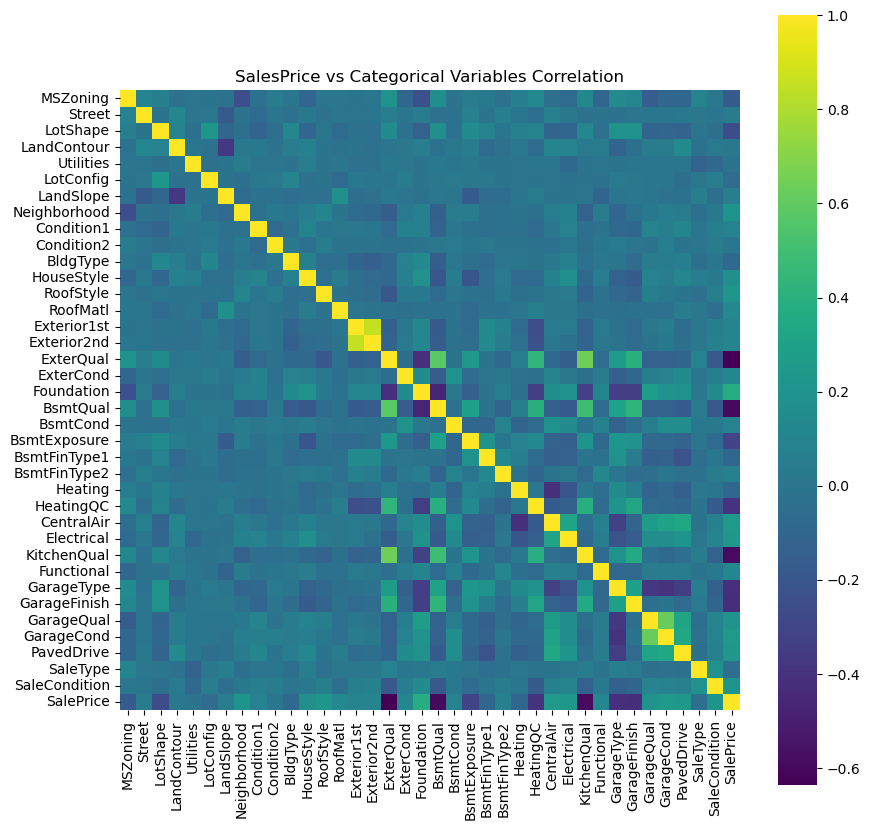

In [20]:
categorical_correlation = encoded_categorical_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(categorical_correlation, square=True, cmap="viridis")
plt.title("SalesPrice vs Categorical Variables Correlation")


In [21]:
# select the topmost 5 correlated categorical variable
cols = categorical_correlation.sort_values('SalePrice', ascending=False).head(3).index.to_list()
cols


['SalePrice', 'Foundation', 'CentralAir']

Text(0.5, 1.0, 'SalesPrice vs Categorical Variables Correlation')

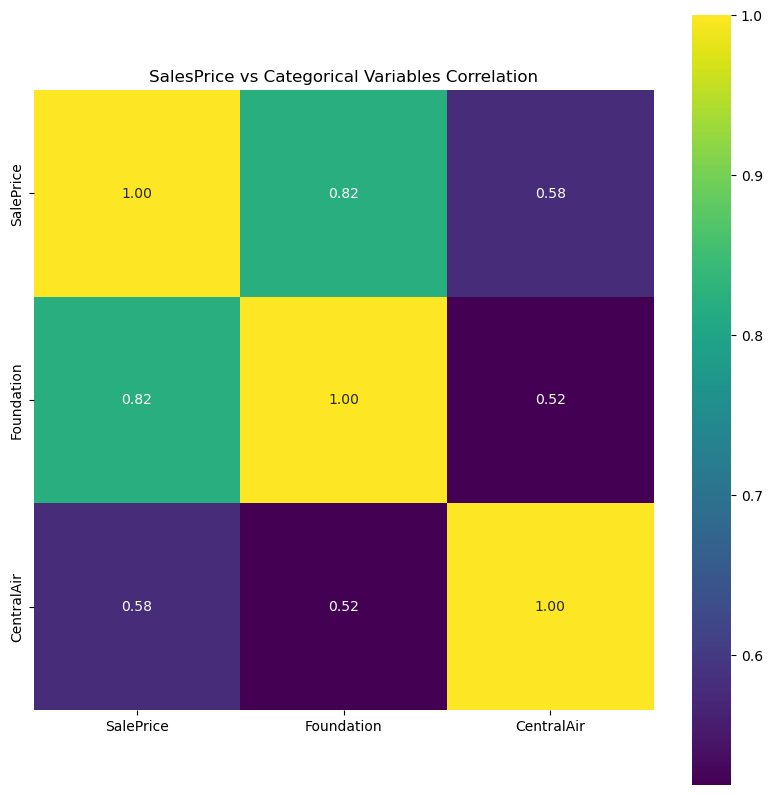

In [22]:
top_categorical_correlation = categorical_correlation[cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(top_categorical_correlation, square=True, cmap="viridis", annot=True, fmt=".2f")
plt.title("SalesPrice vs Categorical Variables Correlation")

### Correlation of Contnuous variables to SalesPrice

Text(0.5, 1.0, 'SalesPrice vs Categorical Variables Correlation')

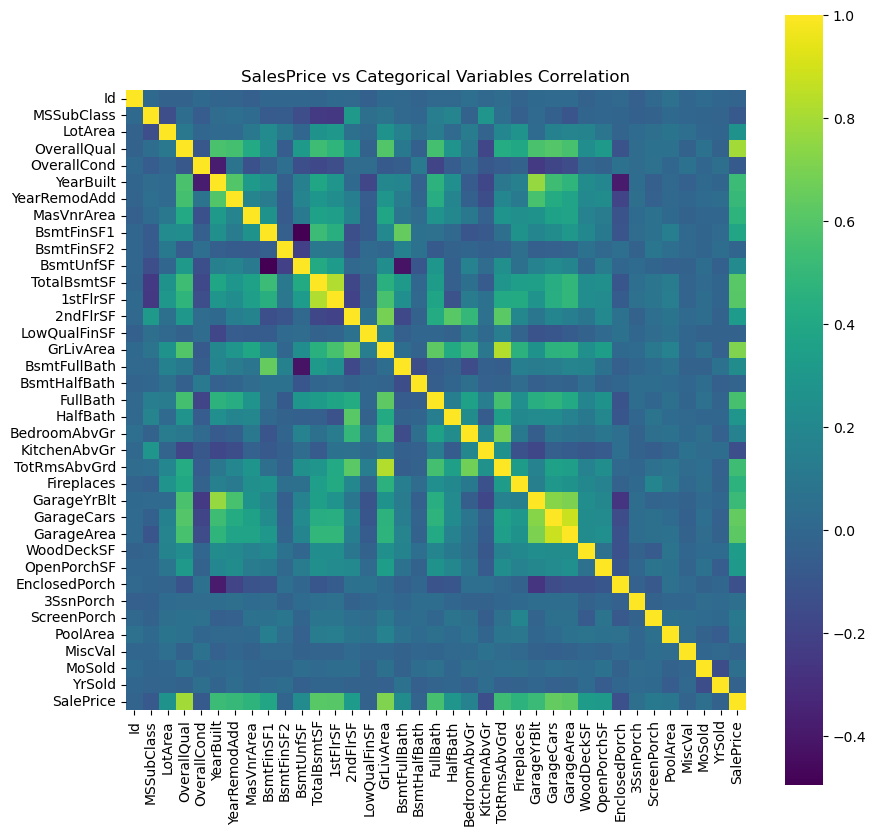

In [23]:
continuous_correlation = train_data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10,10))
sns.heatmap(continuous_correlation, square=True, cmap="viridis")
plt.title("SalesPrice vs Categorical Variables Correlation")



In [24]:
# select the topmost 7 correlated continuous variable
cols = continuous_correlation.sort_values('SalePrice', ascending=False).head(10).index.to_list()
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

Text(0.5, 1.0, 'SalesPrice vs Categorical Variables Correlation')

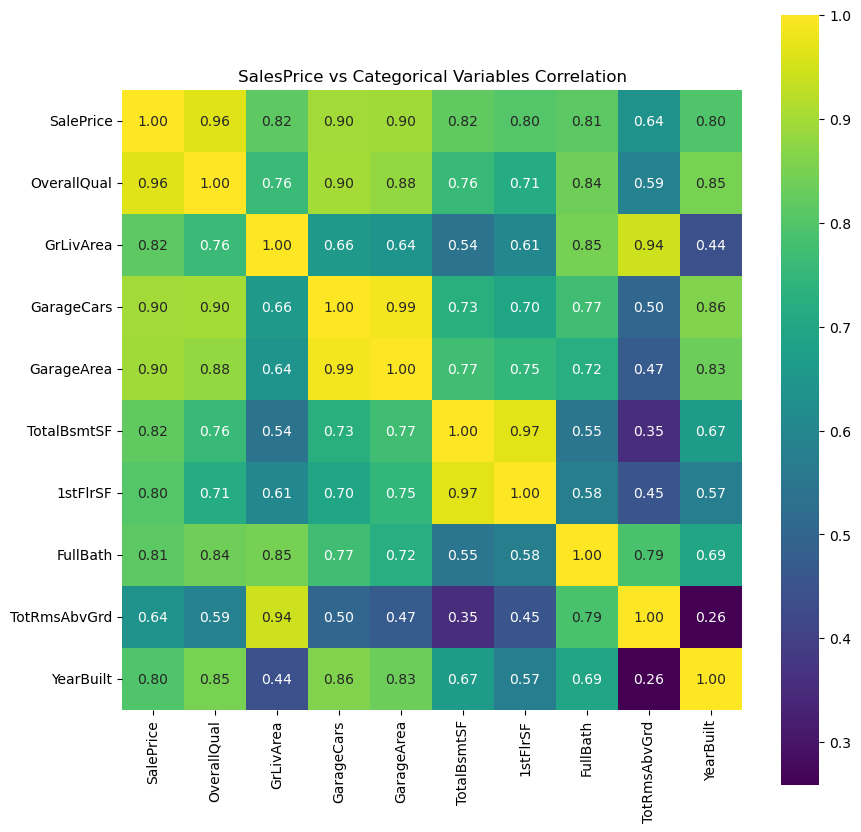

In [25]:
top_continuous_correlation = continuous_correlation[cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(top_continuous_correlation, square=True, cmap="viridis", annot=True, fmt=".2f")
plt.title("SalesPrice vs Categorical Variables Correlation")

> The features of interest base on the correlation matrix of both categorical an d continuoius variables are:
- OverallQual
- GrLivArea
- TotalBsmtSF
- FullBath
- TotRmsAbvGrd
- YearBuilt
- Foundation
- CentralAir

## Modeling

In [26]:
cols_of_interest = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'Foundation', 'CentralAir'] 
df = train_data[cols_of_interest]
df.sample(10)

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir
493,5,1269,1269,1,6,1960,CBlock,Y
208,7,2062,1157,2,7,1988,CBlock,Y
296,5,1558,910,1,6,1950,CBlock,Y
350,9,1869,1869,2,6,2007,PConc,Y
242,5,1440,540,1,6,1900,BrkTil,N
937,7,1971,1113,2,8,2005,PConc,Y
373,5,1319,608,1,5,1953,PConc,Y
166,5,1867,1617,1,7,1955,CBlock,Y
1369,8,1668,1657,2,8,2003,PConc,Y
1185,5,1221,784,1,7,1924,BrkTil,Y


In [27]:
# encoding categorical variables
enc = OrdinalEncoder().set_output(transform="pandas")
encoded_df = enc.fit_transform(df)
encoded_df.sample(10)

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir
1358,5.0,445.0,117.0,2.0,3.0,101.0,2.0,1.0
1395,7.0,793.0,335.0,2.0,7.0,106.0,2.0,1.0
740,4.0,357.0,3.0,2.0,5.0,14.0,0.0,1.0
333,6.0,313.0,489.0,2.0,4.0,105.0,2.0,1.0
344,4.0,167.0,26.0,1.0,2.0,77.0,1.0,1.0
1085,5.0,107.0,225.0,1.0,3.0,93.0,2.0,1.0
658,5.0,369.0,209.0,1.0,4.0,49.0,1.0,1.0
1246,6.0,429.0,117.0,2.0,4.0,106.0,2.0,1.0
357,4.0,191.0,367.0,1.0,4.0,77.0,2.0,1.0
1380,2.0,50.0,185.0,1.0,3.0,18.0,0.0,0.0


In [28]:
# Scaling the feature variables
scaler = StandardScaler()
scaler.fit(encoded_df)

StandardScaler()

In [29]:
scaled_columns = scaler.transform(encoded_df)
scaled_columns[0]

array([ 0.65147924,  0.62198326, -0.61729831,  0.78974052,  0.91428906,
        1.0756586 ,  0.83559903,  0.26381257])

In [30]:
df_features = pd.DataFrame(data=scaled_columns, columns=cols_of_interest)

df_features.head()

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir
0,0.651479,0.621983,-0.617298,0.789741,0.914289,1.075659,0.835599,0.263813
1,-0.071836,-0.534918,0.703496,0.789741,-0.318840,0.139539,-0.549162,0.263813
2,0.651479,0.787863,-0.440856,0.789741,-0.318840,1.006316,0.835599,0.263813
3,0.651479,0.643250,-0.929853,-1.026041,0.297725,-1.871384,-1.933923,0.263813
4,1.374795,1.485406,0.345571,0.789741,1.530854,0.971645,0.835599,0.263813


In [31]:
df_final = df_features.join(train_data['SalePrice'])
df_final.head()

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir,SalePrice
0,0.651479,0.621983,-0.617298,0.789741,0.914289,1.075659,0.835599,0.263813,208500
1,-0.071836,-0.534918,0.703496,0.789741,-0.318840,0.139539,-0.549162,0.263813,181500
2,0.651479,0.787863,-0.440856,0.789741,-0.318840,1.006316,0.835599,0.263813,223500
3,0.651479,0.643250,-0.929853,-1.026041,0.297725,-1.871384,-1.933923,0.263813,140000
4,1.374795,1.485406,0.345571,0.789741,1.530854,0.971645,0.835599,0.263813,250000


### Training and Predicting

In [32]:
X = df_final.drop(['SalePrice'], axis=1) # Feature variables
y = df_final['SalePrice'] # Label variable

In [33]:
# Split dataset into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')



X_train: (1095, 8)
X_test: (365, 8)
y_train: (1095,)
y_test: (365,)


In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
y_pred[y_pred < 0] = 0

### Model Evaluation

In [36]:
def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

In [37]:
compute_rmsle(y_test, y_pred)

0.62

### Test for dataframe equality

In [38]:
df_final.to_parquet(f'{DATA_PATH}/processed_df.parquet', index=False)

In [39]:
processed_df = pd.read_parquet(f'{DATA_PATH}/processed_df.parquet')
processed_df.head()

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir,SalePrice
0,0.651479,0.621983,-0.617298,0.789741,0.914289,1.075659,0.835599,0.263813,208500
1,-0.071836,-0.534918,0.703496,0.789741,-0.318840,0.139539,-0.549162,0.263813,181500
2,0.651479,0.787863,-0.440856,0.789741,-0.318840,1.006316,0.835599,0.263813,223500
3,0.651479,0.643250,-0.929853,-1.026041,0.297725,-1.871384,-1.933923,0.263813,140000
4,1.374795,1.485406,0.345571,0.789741,1.530854,0.971645,0.835599,0.263813,250000


In [40]:
pd.testing.assert_frame_equal(processed_df, df_final)
print("OK 👌")

OK 👌
